This is an experimentally generated python script. Not all commands are supposed to be executable yet.
If you want to give it a try, create conda environment named te_oki:
  `conda create --name te_oki` 
activate the environment: 
  `conda activate te_oki` 
install dependencies: 
  `pip install pyopencl napari ipython matplotlib numpy pyclesperanto_prototype scikit-image` 
Also make sure conda is part of the PATH variable.

If you want to run it from Fiji and you're using a different conda environment, you can configure it in Fijis main menu 
Plugins > ImageJ on GPU (CLIJx-Assistant) > Options >Conda configuration (Te Oki) 
Furthermore, activate the scripting language Te Oki in Fijis script editor to run this script.

In [ ]:
# Stay tuned and check out http://clesperanto.net to learn more.

In [ ]:
# Generator version: 0.6.1.2

In [1]:
import pyclesperanto_prototype as cle
from tifffile import imread

C:\Users\Linux\.conda\envs\te_oki\lib\site-packages\pyclesperanto_prototype\_tier0\_pycl.py:30: UserWarning: Data type double is not supported by your GPU. Will use float instead.
  warnings.warn("Data type double is not supported by your GPU. Will use float instead.")


In [2]:
import numpy as np
import napari
from napari.utils import nbscreenshot
viewer = napari.Viewer()
napari.run()

In [3]:
# list names of all available OpenCL-devices
print("Available OpenCL devices:" + str(cle.available_device_names()))

Available OpenCL devices:['NVIDIA Quadro RTX 8000', 'Quadro RTX 8000', 'Microsoft Basic Render Driver']


In [4]:
# initialize GPU
device = cle.select_device("Quadro RTX 8000")
print("Used GPU: ", device)

Used GPU:  <Quadro RTX 8000 on Platform: NVIDIA CUDA (1 refs)>


In [5]:

# Load image
image = imread(r"D:\Chad\Genitals Mesh Analysis Dec 21\XX\3875_PCW67\test.ome.tiff")

# Push test to GPU memory
image_1 = cle.push(image)


C:\Users\Linux\.conda\envs\te_oki\lib\enum.py:231: RuntimeWarning: coroutine 'get_msg' was never awaited
  for name, canonical_member in enum_class._member_map_.items():


## Copy

In [6]:

# Copy
image_2 = cle.create_like(image_1);
cle.copy(image_1, image_2)
# show result
image2 = np.asarray(image_2)
viewer.add_image(image2, name='image2')



C:\Users\Linux\.conda\envs\te_oki\lib\site-packages\pytools\codegen.py:88: RuntimeWarning: coroutine 'get_msg' was never awaited
  class Indentation:


<Image layer 'image2' at 0x1dd47c32460>

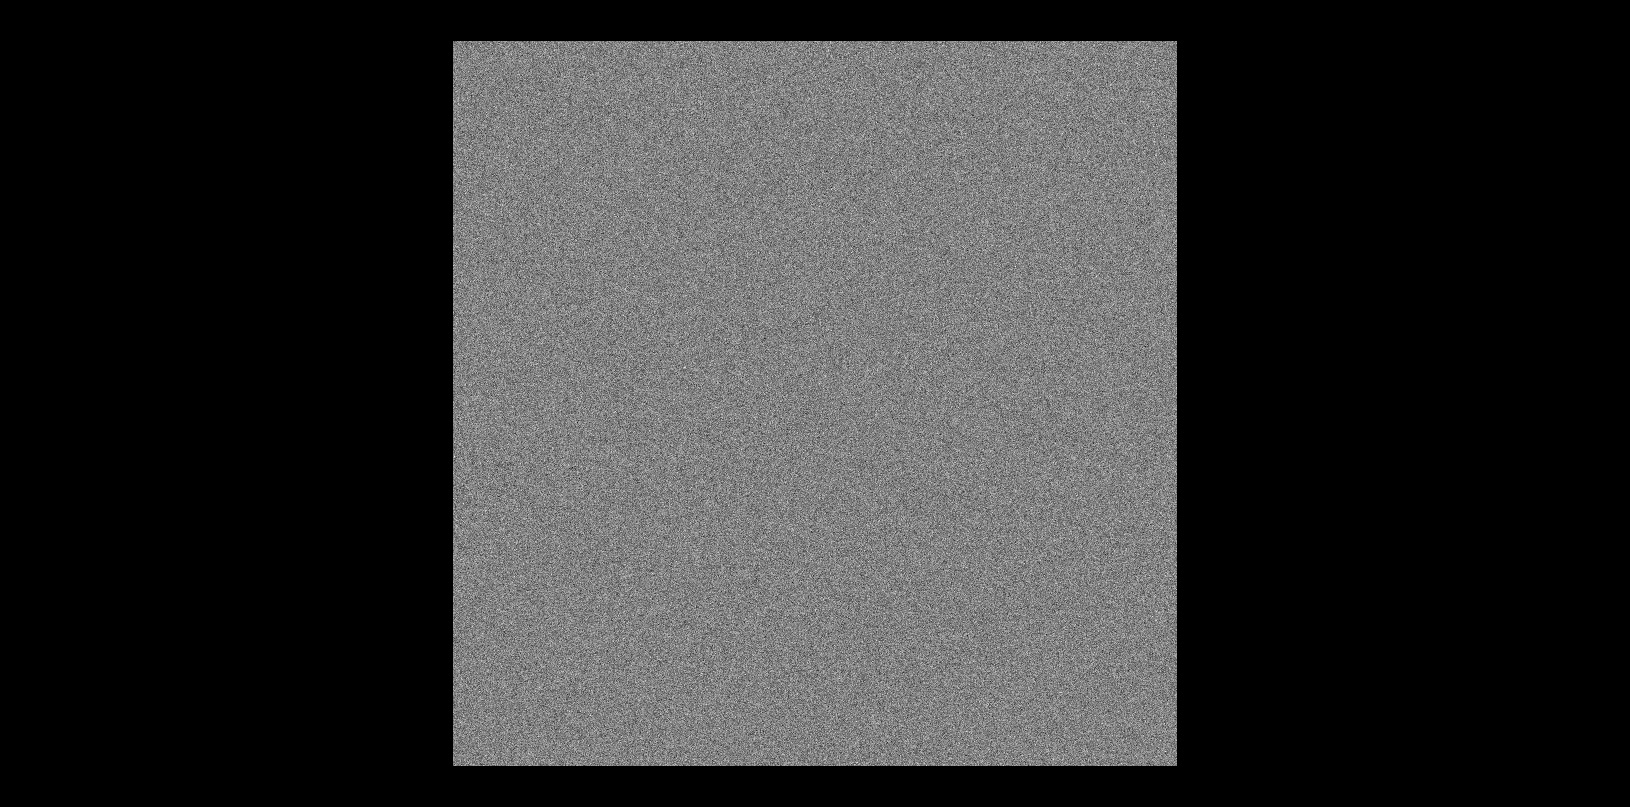

In [7]:
nbscreenshot(viewer, canvas_only=True)

## Gaussian Blur3D

In [8]:

# Gaussian Blur3D
image_3 = cle.create_like(image_2);
sigma_x = 2.0;
sigma_y = 2.0;
sigma_z = 2.0;
cle.gaussian_blur(image_2, image_3, sigma_x, sigma_y, sigma_z)
# show result
image3 = np.asarray(image_3)
viewer.add_image(image3, name='image3')


<Image layer 'image3' at 0x1dd0d0a8520>

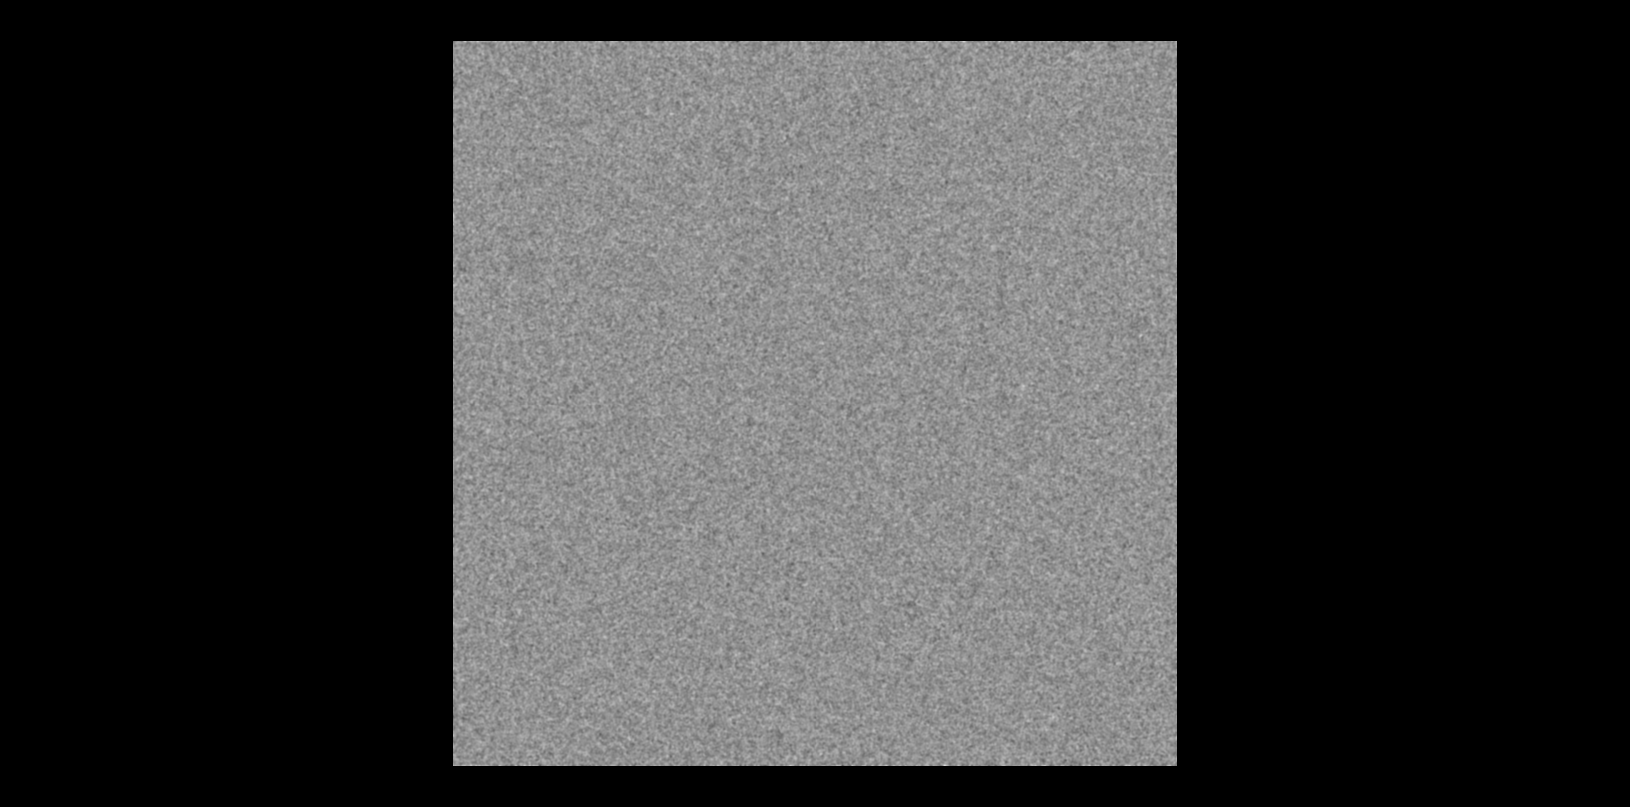

In [9]:
nbscreenshot(viewer, canvas_only=True)

## Binary Fill Holes (Not tested)

In [ ]:

# Binary Fill Holes
image_4 = cle.create_like(image_3);
cle.binary_fill_holes(image_3, image_4)
# show result


